<a href="https://colab.research.google.com/github/apbadzioch/CV_midterm_SP24/blob/main/CV_MidTerm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.applications import VGG16, ResNet50, MobileNetV2
from keras.callbacks import ModelCheckpoint
from keras.datasets import cifar10
from keras.utils import to_categorical

In [2]:
gpu_available = tf.config.list_physical_devices('GPU')
if gpu_available:
  print('yes')
else:
  print('no')

print(tf.config.list_physical_devices('GPU'))

yes
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [40]:
#x_train = tf.image.resize(x_train, (224, 224))
#x_test = tf.image.resize(x_test, (224, 224))

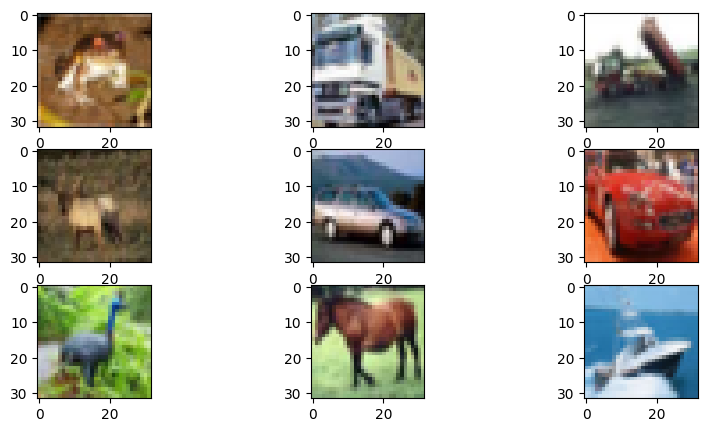

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Class Distribution (Top 10):
[(0, 50000)]


In [4]:
plt.figure(figsize=(10,5))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i])
plt.show()

print('Training data shape:', x_train.shape)
print('Training labels shape:', y_train.shape)
print('Test data shape:', x_test.shape)
print('Test labels shape:', y_test.shape)

from collections import Counter
print('Class Distribution (Top 10):')
print(Counter(np.argmax(y_train, axis=1)).most_common(10))

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True,
    vertical_flip=True,
)

datagen.fit(x_train)

In [7]:
unique_classes = np.unique(y_train)
num_classes = len(unique_classes)

print("number is:", num_classes)

number is: 10


In [8]:
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [9]:
num_classes = 10

base_model = VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

# for layer in base_model.layers[:10]:        optional: when run, accuracy below was ~ 0.1 on epochs = 5
#   layer.trainable = False                             when commented out, acc. was better (0.27, 0.39, 0.46, 0.53, 0.61)
#                                             - Freezing layers seemed to keep accuracy low

x = base_model.output
x = Flatten()(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [13]:
history = model.fit(
    datagen.flow(x_train, y_train_onehot, batch_size=32),                                     # batch size started at 32, then 16 and 64
    epochs=5,  # Adjust as needed, started at 2 and increased                                 # 32 had accuracy of 0.71 and val_accuracy of 0.71
    validation_data=(x_test, y_test_onehot),                                                  # 16 had accuracy of 0.64 and val_accuracy of 0.66
    callbacks=[ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')]     #
)

# 1. n/n [===============] first n is the total number of batches processed in the current epoch, the second n is the total number of batches in the dataset (determined by the batch_size and size of traing set)


Epoch 1/5
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8817 - accuracy: 0.6892 - val_loss: 0.8716 - val_accuracy: 0.7036
Epoch 2/5
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8558 - accuracy: 0.7001 - val_loss: 1.0077 - val_accuracy: 0.6920
Epoch 3/5
1563/1563 [==============================] - 74s 48ms/step - loss: 0.8622 - accuracy: 0.6986 - val_loss: 0.8767 - val_accuracy: 0.7007
Epoch 4/5
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8893 - accuracy: 0.6888 - val_loss: 0.9858 - val_accuracy: 0.6790
Epoch 5/5
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8073 - accuracy: 0.7196 - val_loss: 0.8744 - val_accuracy: 0.7121


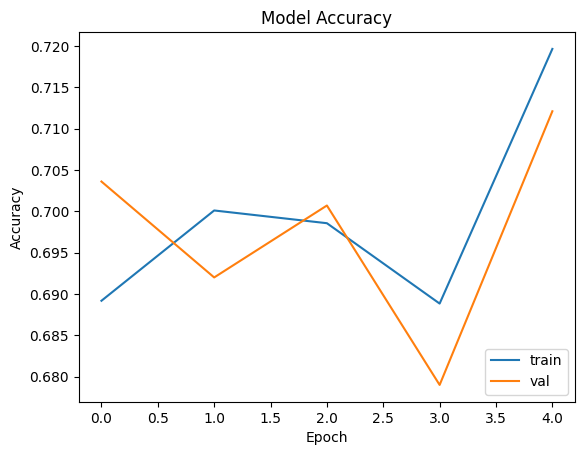

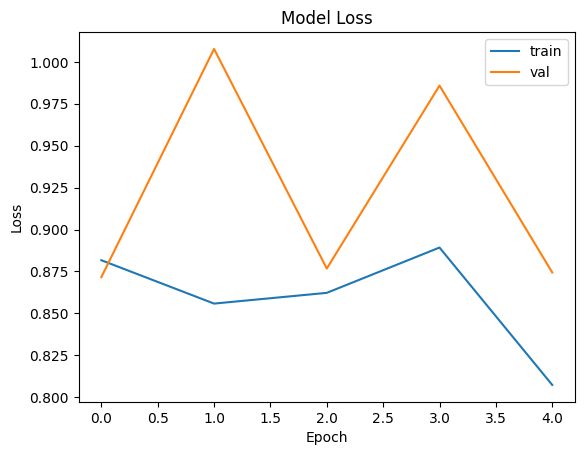

In [15]:
# Plot training and validation curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')